In [1]:
import random
import numpy as np
import pandas as pd
import json

from deap import base, creator, tools, algorithms
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('data.csv')
coordinates = data.loc[:, 'COORD':'SECTION'].values.tolist()
num_of_cities = len(data)
cities = range(len(data.loc[:, 'NODE'].values))
cityDict = list(zip(cities, coordinates))

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [4]:
toolbox = base.Toolbox()
# permutation for individuals to be generated population
toolbox.register("indices", random.sample, range(num_of_cities), num_of_cities)
toolbox.register("individual", tools.initIterate, creator.Individual,toolbox.indices)
# population
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [5]:
def evaluation(iterations, cityDict, sample):
    eucl_distance = []
    temp = 0
    for i in range(iterations-1):
        currentCityCoord = np.asarray(cityDict[sample[i]][1])
        nextCityCoord = np.asarray(cityDict[sample[i+1]][1])
        temp = np.linalg.norm(currentCityCoord - nextCityCoord)   
        eucl_distance.append(temp)
    return [sum(eucl_distance)]

In [6]:
toolbox.register("evaluate", evaluation,num_of_cities,cityDict)
toolbox.register("mate", tools.cxOrdered) #crossover
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05) #mutation
toolbox.register("select", tools.selTournament, tournsize=10) #selection

In [7]:
def implement():
    random.seed(39)
    POP_SIZE = num_of_cities
    N_ITERATIONS = 400
    
    pops = toolbox.population(n=int(POP_SIZE*1.5))
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    algorithms.eaSimple(pops, toolbox, 0.6, 0.05, N_ITERATIONS, stats=stats, halloffame=hof)
    
    best_ind = tools.selBest(pops, 1)[0]
    
    return best_ind

In [8]:
individual = implement()

gen	nevals	avg  	std    	min    	max    
0  	355   	12406	392.456	11192.7	13449.8
1  	234   	11830.3	297.462	11006.6	12803.9
2  	228   	11476.3	262.154	10841.4	12387.3
3  	226   	11231.7	259.943	10633.7	12608.5
4  	219   	11041.6	253.123	10545.1	12158.4
5  	207   	10849.1	234.9  	10096.6	11647.8
6  	224   	10711.7	240.633	10023.5	11782.9
7  	215   	10550.6	237.775	10023.5	11603.4
8  	203   	10298.9	219.808	9873.59	11209.1
9  	205   	10082.7	140.444	9811.87	10905.4
10 	203   	10001.1	160.168	9641.12	11209.5
11 	186   	9906.62	158.165	9539.92	10729.8
12 	221   	9801.49	187.025	9499.32	11038.4
13 	237   	9670.04	138.935	9357.38	10633.8
14 	229   	9599.72	155.837	9309.32	10543.2
15 	201   	9481.06	154.786	9120.1 	10614.4
16 	211   	9391.57	169.383	8997.13	10483.6
17 	238   	9296.16	194.591	8844.74	10305.5
18 	195   	9147.71	195.231	8788.81	10180.9
19 	210   	9006.05	179.948	8690.69	10464.6
20 	189   	8883.27	151.852	8681.68	10135.5
21 	188   	8821.51	162.89 	8537.84	10121.5
22 	223   	8775

190	226   	5584.08	344.833	5494.78	7911.63
191	226   	5548.92	272.408	5494.78	7469.99
192	209   	5569.09	339.153	5494.78	8182.36
193	228   	5564.88	302.114	5494.78	7820.44
194	202   	5545.37	265.12 	5494.78	7721.55
195	231   	5537.55	257.851	5494.78	7790.08
196	201   	5554.35	288.993	5494.78	7541.85
197	221   	5577.09	333.289	5494.78	7684.42
198	225   	5558.77	308.857	5494.78	8062.62
199	225   	5569.02	302.854	5494.78	7257.87
200	204   	5572.89	328.051	5494.78	7639.99
201	228   	5543.04	242.192	5494.78	7269.66
202	220   	5558.12	314.344	5494.78	8285.32
203	216   	5562.45	299.433	5494.78	7518.86
204	230   	5578.62	340.497	5494.78	7952.69
205	207   	5537.33	230.02 	5494.78	7460.5 
206	224   	5569.04	303.244	5494.78	7689.79
207	229   	5544.24	248.998	5494.78	7253.59
208	222   	5572.44	315.022	5494.78	7484.27
209	206   	5565.78	303.715	5494.78	7298.92
210	223   	5534.63	209.418	5494.78	6932.58
211	204   	5557.41	260.376	5494.78	7155.52
212	213   	5569.82	323.687	5494.78	7676.28
213	216   	

381	221   	5562.76	283.422	5494.78	7576.56
382	225   	5570.89	327.696	5494.78	7305.13
383	216   	5544.7 	246.653	5494.78	7436.5 
384	227   	5560.29	295.421	5494.78	7405.92
385	214   	5565.66	321.03 	5494.78	7642.59
386	224   	5566.94	326.362	5494.78	8372.98
387	229   	5564.8 	308.747	5494.78	7648.83
388	223   	5553.9 	285.412	5494.78	7600.28
389	227   	5578.41	347.674	5494.78	7988.11
390	223   	5588.71	371.923	5494.78	8135.77
391	223   	5561.51	332.932	5494.78	8080.75
392	221   	5565.25	313.763	5494.78	7627.66
393	220   	5565.11	298.437	5494.78	7444.15
394	241   	5553.23	251.755	5494.78	7152.45
395	215   	5539.63	244.129	5494.78	7411.58
396	205   	5543.39	256.952	5494.78	7617.07
397	217   	5575.77	338.759	5494.78	7642.62
398	204   	5539.74	242.577	5494.78	7824.3 
399	226   	5535.65	231.172	5494.78	7420.28
400	201   	5559.4 	286.904	5494.78	7471.75


In [9]:
print('Best Path', individual)

Best Path [44, 3, 20, 16, 6, 42, 97, 127, 100, 182, 196, 131, 126, 149, 203, 101, 66, 73, 13, 22, 39, 19, 29, 59, 1, 12, 77, 122, 152, 116, 156, 161, 159, 227, 225, 224, 164, 115, 114, 94, 83, 18, 30, 14, 55, 68, 27, 24, 45, 121, 137, 151, 193, 113, 111, 109, 102, 61, 23, 32, 26, 36, 70, 69, 81, 82, 125, 200, 215, 233, 163, 165, 104, 43, 49, 58, 15, 47, 54, 57, 79, 31, 74, 41, 76, 67, 96, 88, 180, 188, 171, 128, 103, 38, 33, 37, 46, 56, 5, 7, 2, 130, 135, 145, 136, 179, 133, 99, 205, 216, 220, 185, 186, 187, 178, 118, 129, 147, 209, 175, 169, 138, 50, 25, 48, 62, 60, 107, 93, 52, 80, 51, 75, 98, 90, 95, 117, 123, 212, 204, 213, 174, 226, 191, 197, 195, 92, 34, 53, 35, 17, 71, 108, 160, 162, 124, 142, 132, 119, 110, 112, 154, 148, 150, 176, 153, 144, 190, 183, 194, 170, 140, 40, 8, 4, 0, 21, 9, 85, 106, 78, 87, 228, 230, 223, 141, 218, 232, 214, 206, 231, 157, 143, 91, 10, 11, 72, 105, 86, 64, 28, 65, 63, 84, 89, 120, 168, 158, 167, 172, 173, 177, 236, 219, 221, 202, 189, 181, 139, 210,

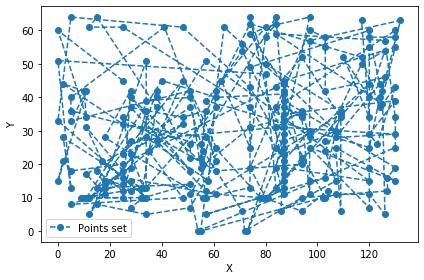

In [10]:
def plot_route(coordinates, order=None, is_route=True):
    x = list()
    y = list()
    if order is not None:
        for point in order:
            x.append(coordinates[point][0])
            y.append(coordinates[point][1])
    else:
        for c in coordinates:
            x.append(c[0])
            y.append(c[1])

    linestyle = '--' if is_route else ''
    plt.figure()
    plt.plot(x, y, label='Points set', linestyle=linestyle, marker='o')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    plt.show()
    
plot_route(coordinates, individual)